# PID visualizer

A PID controller continuously calculates an error and applies a corrective action to resolve it. 
Given two motors (differential wheeled robot), they will always spin at slightly different speeds due to their physical characteristics and imperfections. Focus on keeping one of them to the right RPM value; in this case, the error is the motor spinning at the wrong speed and the corrective action is changing the power to the motor. It is this continuous testing of the motor’s speed and adjusting it to the correct speed which will make our robot’s motors spin at the correct speed and go straight.

PID is a 'control loop feedback' mechanism. The controller will have a target motor speed that it wishes to maintain; each time the encoder values are sampled, it will calculate the difference (or error) between the target speed and the actual speed and apply an adjustment to the motor speed. If the adjustment overshoots the next time the encoders are sampled, a smaller opposite adjustment will be made. Over time, the adjustments will even out and the motors will run at a constant speed.

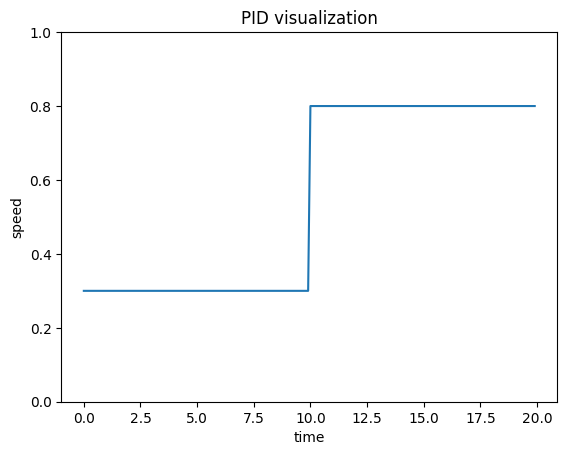

In [4]:
# plot the target speed

import matplotlib.pyplot as plt
import numpy as np

interval = 20 # seconds
sampling_time = 0.1

initial_target_speed = 0.3
final_target_speed = 0.8 

def step (x, x0, y1, y2):
    return [y1 if i < x0 else y2 for i in range(len(x))]

x = np.arange(0, interval, sampling_time)
y_target = step(x, len(x) // 2, initial_target_speed, final_target_speed)

# plot target speed
plt.plot(x, y_target)

plt.title('PID visualization')
plt.ylabel('speed')
plt.xlabel('time')

plt.ylim([0, 1])
plt.show()

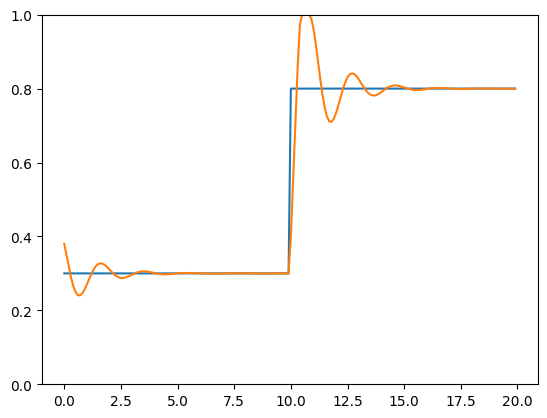

In [18]:
KP = 0.2
KI = 0.1
KD = 0.05

# KP = 0.8
# KI = 0.01
# KD = 0.01

prev_error = 0
sum_error = 0

y_current = []

current_speed = 0.4

for i in range(len(x)):

    error = y_target[i] - current_speed

    current_speed += (error * KP) + (prev_error * KD) + (sum_error * KI)
    current_speed = max(min(1, current_speed), 0) # clamp the value between 0 and 1
    y_current.append(current_speed)

    prev_error = error
    sum_error += error


# plot the result
plt.plot(x, y_target)
plt.plot(x, y_current)

plt.ylim([0, 1])
plt.show()